In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Question 1

In [2]:
# (1)
df = pd.read_csv('data_banknote_authentication.txt', sep=',', header=None, 
                 names=['f1', 'f2', 'f3', 'f4', 'class'])
df['color'] = df['class'].apply(lambda x: 'green' if x == 0 else 'red')
df

,f1,f2,f3,f4,class,color
0,3.62160,8.66610,-2.8073,-0.44699,0,green
1,4.54590,8.16740,-2.4586,-1.46210,0,green
2,3.86600,-2.63830,1.9242,0.10645,0,green
3,3.45660,9.52280,-4.0112,-3.59440,0,green
4,0.32924,-4.45520,4.5718,-0.98880,0,green
...,...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1,red
1368,-1.38870,-4.87730,6.4774,0.34179,1,red
1369,-3.75030,-13.45860,17.5932,-2.77710,1,red
1370,-3.56370,-8.38270,12.3930,-1.28230,1,red


In [3]:
# (2)
df.groupby('class').mean()

,f1,f2,f3,f4
class,,,,
0,2.276686,4.256627,0.796718,-1.147640
1,-1.868443,-0.993576,2.148271,-1.246641


In [4]:
df.groupby('class').std()

,f1,f2,f3,f4
class,,,,
0,2.019348,5.138792,3.239894,2.125077
1,1.881183,5.404884,5.261811,2.070984


In [5]:
df.mean(numeric_only=True)

f1       0.433735
f2       1.922353
f3       1.397627
f4      -1.191657
class    0.444606
dtype: float64

In [6]:
df.std(numeric_only=True)

f1       2.842763
f2       5.869047
f3       4.310030
f4       2.101013
class    0.497103
dtype: float64

## Question 2

In [7]:
# (1)
# Train-test split
X_train, X_test = train_test_split(df, test_size=0.5, random_state=27)

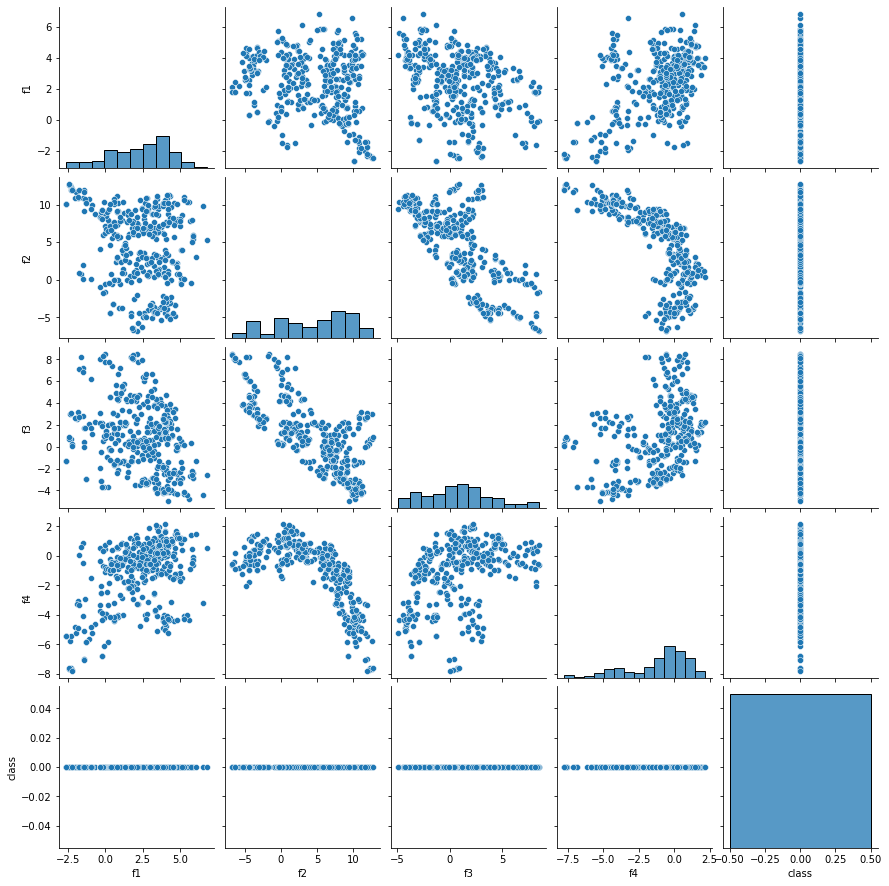

In [8]:
# Plot pairplot and save as pdf
sns.pairplot(X_train[X_train['color']=='green'])
plt.savefig('good_bills.pdf')
plt.show()

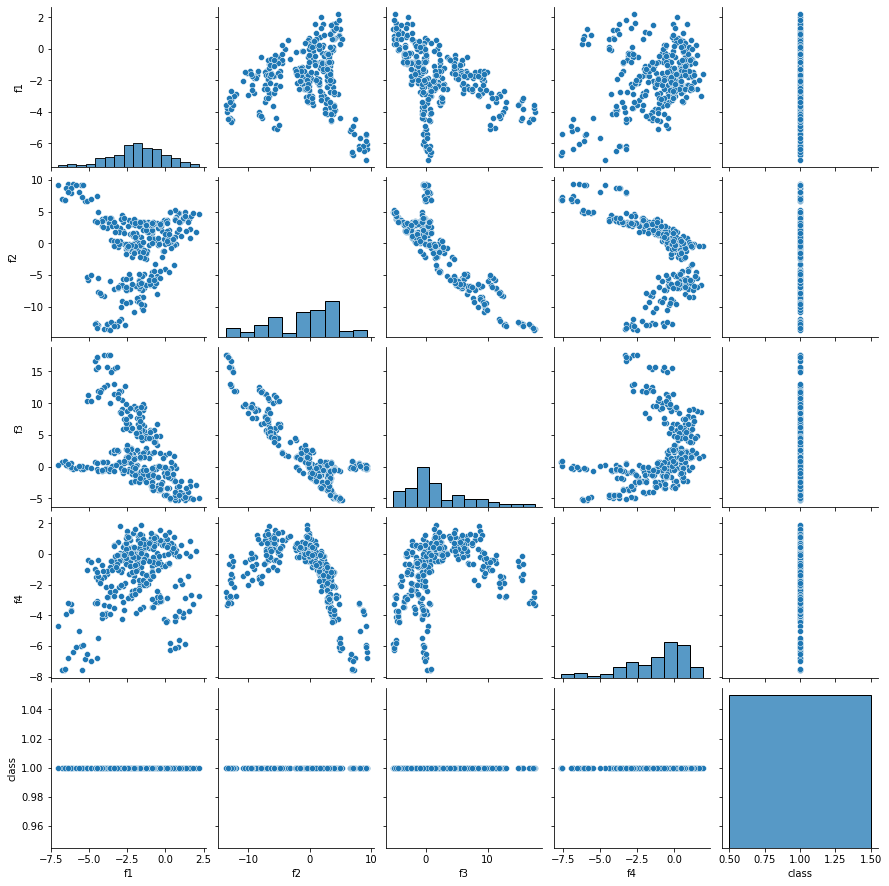

In [9]:
sns.pairplot(X_train[X_train['color']=='red'])
plt.savefig('fake_bills.pdf')
plt.show()

In [10]:
# (2)
def simple_classifier(row):    
    if (row['f1'] < -3) and (row['f2'] < -8) and (row['f3'] > 10):
        predict = 'red'
    else:
        predict = 'green'
    return predict

In [11]:
# (3)
# Use my simple rule to classify X_test
X_test['predict'] = X_test.apply(lambda x: simple_classifier(x), axis=1)
X_test

,f1,f2,f3,f4,class,color,predict
202,-0.78689,9.5663,-3.78670,-7.50340,0,green,green
117,2.10800,6.7955,-0.17080,0.49050,0,green,green
733,3.82440,-3.1081,2.45370,0.52024,0,green,green
1325,-5.52500,6.3258,0.89768,-6.62410,1,red,green
1015,-0.90784,-7.9026,6.78070,0.34179,1,red,green
...,...,...,...,...,...,...,...
59,-0.78289,11.3603,-0.37644,-7.04950,0,green,green
1089,-2.98210,4.1986,-0.58980,-3.96420,1,red,green
1055,-0.60254,1.7237,-2.15010,-0.77027,1,red,green
527,2.53280,7.5280,-0.41929,-2.64780,0,green,green


In [12]:
# (4)
# calculate TP/FP/TN/FN
def compute_stats(true_label, pred_label, stats):
    # 5th column is real color, 6th column is predicted color
    validation_list = [1 if (X_test.iloc[i,5]==true_label) & (X_test.iloc[i,6]==pred_label) else 0 for i in range(len(X_test))]
    count = sum(validation_list)
    print(f'The value of {stats} is {count}')
    return count

In [13]:
TP = compute_stats('green', 'green', 'TP')
FP = compute_stats('red', 'green', 'FP')
TN = compute_stats('red', 'red', 'TN')
FN = compute_stats('green', 'red', 'FN')
TPR = TP/(TP + FN)
TNR = TN/(TN + FP)
accuracy = (TP + TN)/len(X_test)
print(f'The value of TPR is {TPR}')
print(f'The value of TNR is {TNR}')
print(f'The value of accuracy is {accuracy}')

The value of TP is 390
The value of FP is 277
The value of TN is 19
The value of FN is 0
The value of TPR is 1.0
The value of TNR is 0.06418918918918919
The value of accuracy is 0.5962099125364432


## Question 3

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [15]:
# (1)
# Scale data
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train.iloc[:,:4])
X_test_sc = scaler.transform(X_test.iloc[:,:4])

# take k = 3, 5, 7, 9, 11. Train KNN classifier
def knn_train(X_train_sc, X_test_sc, k):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_sc, X_train['class'])
    test_predictions = clf.predict(X_test_sc)
    accuracy = accuracy_score(X_test['class'], test_predictions)
    return accuracy, test_predictions

In [17]:
X_train_sc

array([[ 1.1601738 , -0.99164599,  0.68027671,  1.19852278],
       [-0.48467078, -1.45190085,  1.02527093,  0.81923354],
       [-1.50791631,  0.37041889, -0.40223996, -0.46595243],
       ...,
       [-0.00285679,  0.8063539 , -0.40962637,  0.29627015],
       [-0.63809256,  1.66730725, -0.34533875, -2.78184842],
       [-1.08858221, -0.03942508, -0.13710283,  0.51909175]])

In [16]:
# Compute Accuracy
acc_list = []
k_list = [3, 5, 7, 9, 11]
for k in k_list:
    acc_list.append(knn_train(X_train_sc, X_test_sc, k)[0])
    print(f'Accuracy for k={k} is {knn_train(X_train_sc, X_test_sc, k)[0]}')

Accuracy for k=3 is 0.9970845481049563
Accuracy for k=5 is 0.9970845481049563
Accuracy for k=7 is 0.9883381924198251
Accuracy for k=9 is 0.9839650145772595
Accuracy for k=11 is 0.9825072886297376


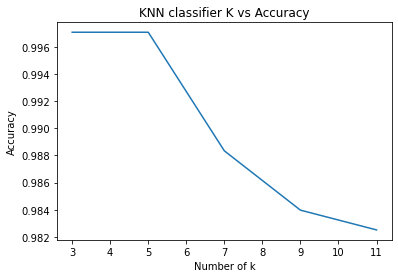

In [57]:
# (2)
# Plot accuracy with k
plt.plot(k_list, acc_list)
plt.title('KNN classifier K vs Accuracy')
plt.xlabel('Number of k')
plt.ylabel('Accuracy')
plt.show()

In [18]:
# (3)
# use the optimal value k∗ to compute performance measures
X_test['predict_5'] = knn_train(X_train_sc, X_test_sc, 5)[1]

# Change predict_5 column to the 6th column
# to use the above func compute performance measures
X_test = X_test[['f1', 'f2', 'f3', 'f4', 'class', 'color', 'predict_3', 'predict']]

In [19]:
TP = compute_stats('green', 0, 'TP')
FP = compute_stats('red', 0, 'FP')
TN = compute_stats('red', 1, 'TN')
FN = compute_stats('green', 1, 'FN')
TPR = TP/(TP + FN)
TNR = TN/(TN + FP)
accuracy = (TP + TN)/len(X_test)
print(f'The value of TPR is {TPR}')
print(f'The value of TNR is {TNR}')
print(f'The value of accuracy is {accuracy}')

The value of TP is 388
The value of FP is 0
The value of TN is 296
The value of FN is 2
The value of TPR is 0.9948717948717949
The value of TNR is 1.0
The value of accuracy is 0.9970845481049563


In [20]:
# (4)
# predict for last 4 digits of my  BUID
id_df = pd.DataFrame({'f1':6,'f2':1,'f3':7,'f4':7}, index=[0])
# Simple classifier
id_df['predict'] = id_df.apply(lambda x: simple_classifier(x), axis=1)
print(f'The Prediction of my BUID as feature values by using my simple classifier is: {id_df["predict"][0]}')

The Prediction of my BUID as feature values by using my simple classifier is: green


In [21]:
# kNN
# Scale my ID data
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train.iloc[:,:4])
id_df_test_sc = scaler.transform(id_df.iloc[:,:4])

# Predict
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_sc, X_train['class'])
test_predictions = clf.predict(id_df_test_sc)
print(f'The Prediction of my BUID as feature values by using best k* kNN classifier is: {test_predictions[0]}')

The Prediction of my BUID as feature values by using best k* kNN classifier is: 0


## Question 4

In [52]:
feature_list = ['f1', 'f2', 'f3', 'f4']
for feature in feature_list:
    # Drop the selected feature for Xtrain and Xtest
    reduce_feature_train = X_train.drop(labels=feature, axis=1, inplace=False)
    reduce_feature_test = X_test.drop(labels=feature, axis=1, inplace=False)
    
    # DataScaler
    reduce_feature_train_sc = scaler.fit_transform(reduce_feature_train.iloc[:,:3])
    reduce_feature_test_sc = scaler.transform(reduce_feature_test.iloc[:,:3])
    
    # Train and test data
    print(f'Accuracy for missing {feature} feature is {knn_train(reduce_feature_train_sc, reduce_feature_test_sc, 3)[0]}')

Accuracy for missing f1 feature is 0.9620991253644315
Accuracy for missing f2 feature is 0.9752186588921283
Accuracy for missing f3 feature is 0.9766763848396501
Accuracy for missing f4 feature is 0.9941690962099126


,f1
450,3.69220
771,-0.98540
1305,-3.89530
1255,-2.50840
245,4.21340
...,...
1048,-0.84710
1317,-1.26670
752,0.38478
543,-1.42170


## Question 5

In [54]:
# (1)
# Train logistic regression classifier on Xtrain
def logistic_reg(X_train, X_test):
    log_reg = LogisticRegression()
    log_reg.fit(X_train.iloc[:,:4], X_train['class'])
    log_predictions = log_reg.predict(X_test.iloc[:,:4])
    
    # Compute its accuracy for Xtest 
    log_accuracy = accuracy_score(X_test['class'], log_predictions)
    return log_accuracy, log_predictions

In [35]:
X_test

,f1,f2,f3,f4,class,color,predict_3,predict
202,-0.78689,9.5663,-3.78670,-7.50340,0,green,0,green
117,2.10800,6.7955,-0.17080,0.49050,0,green,0,green
733,3.82440,-3.1081,2.45370,0.52024,0,green,0,green
1325,-5.52500,6.3258,0.89768,-6.62410,1,red,1,green
1015,-0.90784,-7.9026,6.78070,0.34179,1,red,1,green
...,...,...,...,...,...,...,...,...
59,-0.78289,11.3603,-0.37644,-7.04950,0,green,0,green
1089,-2.98210,4.1986,-0.58980,-3.96420,1,red,1,green
1055,-0.60254,1.7237,-2.15010,-0.77027,1,red,1,green
527,2.53280,7.5280,-0.41929,-2.64780,0,green,0,green


In [39]:
# (2)
# use the optimal value k∗ to compute performance measures
X_test.loc[:,'predict_log'] = logistic_reg()[1]
print(f'The accuracy of Logistic Regression is {logistic_reg()[0]}')

# Change predict_log column to the 6th column
# to use the above func compute performance measures
X_test = X_test[['f1', 'f2', 'f3', 
                 'f4', 'class', 'color', 
                 'predict_log', 'predict_5', 'predict']]

The accuracy of Logistic Regression is 0.9868804664723032


In [42]:
TP = compute_stats('green', 0, 'TP')
FP = compute_stats('red', 0, 'FP')
TN = compute_stats('red', 1, 'TN')
FN = compute_stats('green', 1, 'FN')
TPR = TP/(TP + FN)
TNR = TN/(TN + FP)
accuracy = (TP + TN)/len(X_test)
print(f'The value of TPR is {TPR}')
print(f'The value of TNR is {TNR}')
print(f'The value of accuracy is {accuracy}')

The value of TP is 383
The value of FP is 2
The value of TN is 294
The value of FN is 7
The value of TPR is 0.982051282051282
The value of TNR is 0.9932432432432432
The value of accuracy is 0.9868804664723032


In [51]:
# (5)
# Predict
log_reg = LogisticRegression()
log_reg.fit(X_train.iloc[:,:4], X_train['class'])
id_log_predictions = log_reg.predict(id_df.iloc[:,:4])
print(f'The Prediction of my BUID as feature values by using Logistic Regression classifier is: {id_log_predictions[0]}')

The Prediction of my BUID as feature values by using Logistic Regression classifier is: 0


## Question 6

In [55]:
feature_list = ['f1', 'f2', 'f3', 'f4']
for feature in feature_list:
    # Drop the selected feature for Xtrain and Xtest
    reduce_feature_train = X_train.drop(labels=feature, axis=1, inplace=False)
    reduce_feature_test = X_test.drop(labels=feature, axis=1, inplace=False)
    
    # Train and test data
    print(f'Accuracy for missing {feature} feature is {logistic_reg(reduce_feature_train, reduce_feature_test)[0]}')

Accuracy for missing f1 feature is 1.0
Accuracy for missing f2 feature is 0.9985422740524781
Accuracy for missing f3 feature is 1.0
Accuracy for missing f4 feature is 1.0
